In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import pickle

%load_ext autoreload
%autoreload 3

### Load CM2

In [2]:
def sort_longitude(x):
    x['lon'] = np.where(x['lon']>0, x['lon'], 360+x['lon'])
    x = x.sortby('lon')
    return x

In [3]:
# atm has 576 * 360 grid
# ocn has 3600 * 2700 grid
atm = xr.open_dataset('../data/Global/GFDL_CM2p6_control_atm_0101.nc', chunks={})
atm['t_ref'] = atm['t_ref'] - 273.15
atm

<xarray.Dataset>
Dimensions:  (grid_yt: 360, grid_xt: 576)
Coordinates:
  * grid_xt  (grid_xt) float64 0.3125 0.9375 1.562 2.188 ... 358.4 359.1 359.7
  * grid_yt  (grid_yt) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
    time     object ...
Data variables:
    u_ref    (grid_yt, grid_xt) float32 dask.array<chunksize=(360, 576), meta=np.ndarray>
    v_ref    (grid_yt, grid_xt) float32 dask.array<chunksize=(360, 576), meta=np.ndarray>
    t_ref    (grid_yt, grid_xt) float32 dask.array<chunksize=(360, 576), meta=np.ndarray>
    q_ref    (grid_yt, grid_xt) float32 dask.array<chunksize=(360, 576), meta=np.ndarray>
    rh_ref   (grid_yt, grid_xt) float32 dask.array<chunksize=(360, 576), meta=np.ndarray>
    ps       (grid_yt, grid_xt) float32 dask.array<chunksize=(360, 576), meta=np.ndarray>
    wind     (grid_yt, grid_xt) float32 dask.array<chunksize=(360, 576), meta=np.ndarray>
    evap     (grid_yt, grid_xt) float32 dask.array<chunksize=(360, 576), meta=np.ndarray>
    precip   (grid_yt, grid_xt) float32 dask.array<chunksize=(360, 576), meta=np.ndarray>
Attributes:
    code_version:  $Name: fre-nctools-bronx-10 $
    filename:      01200101.atmos_daily.tile1.nc
    grid_tile:     N/A
    grid_type:     regular
    history:       fregrid --input_mosaic /ptmp/rds/WGA/MOSAIC/C180_mosaic.nc...
    title:         CM2.6_miniBling

In [4]:
ocn = xr.open_dataset('../data/Global/GFDL_CM2p6_control_ocn_0101.nc', chunks={})
ocn = ocn.isel(time=0)

ocn = ocn.rename({'xt_ocean': 'lon', 'yt_ocean': 'lat'})
ocn = sort_longitude(ocn)
atm['sst'] = ocn.surface_temp.interp(lon=atm['grid_xt'],lat=atm['grid_yt'])
ocn = ocn.rename({'lon': 'xt_ocean', 'lat': 'yt_ocean'})

ocn = ocn.rename({'xu_ocean': 'lon', 'yu_ocean': 'lat'})
ocn = sort_longitude(ocn)
atm['usurf'] = ocn.usurf.interp(lon=atm['grid_xt'],lat=atm['grid_yt'])
atm['vsurf'] = ocn.vsurf.interp(lon=atm['grid_xt'],lat=atm['grid_yt'])
ocn = ocn.rename({'lon': 'xu_ocean', 'lat': 'yu_ocean'})

Text(0.5, 1.0, '$T_a - T_o$')

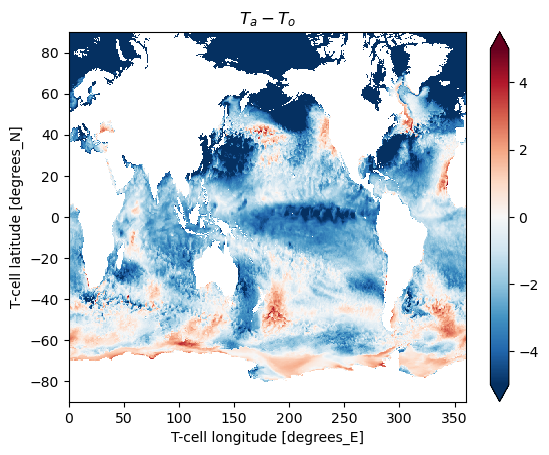

In [5]:
(atm.t_ref - atm.sst).plot(cmap='RdBu_r', vmax=5, vmin=-5)
plt.title(r'$T_a - T_o$')

Text(0.5, 1.0, '$T_a - T_o$')

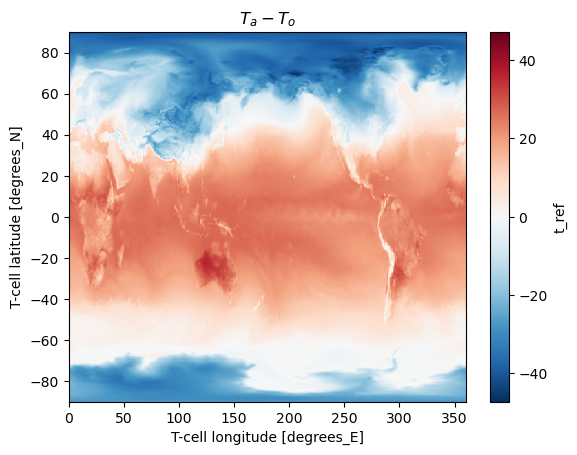

In [6]:
atm.t_ref.plot()
plt.title(r'$T_a - T_o$')

Text(0.5, 1.0, '$T_a - T_o$')

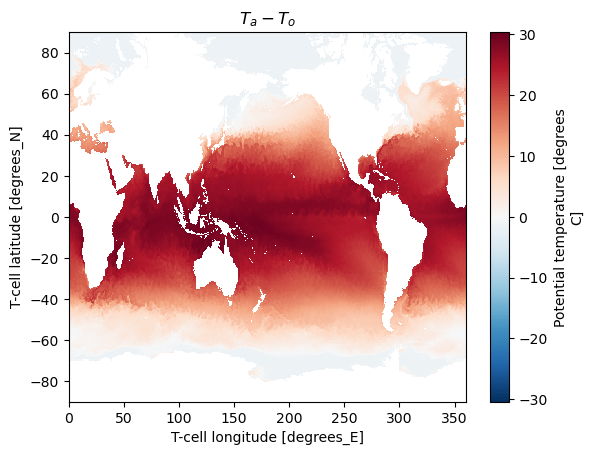

In [7]:
atm.sst.plot()
plt.title(r'$T_a - T_o$')

Text(0.5, 1.0, 'Specific humidity $q$')

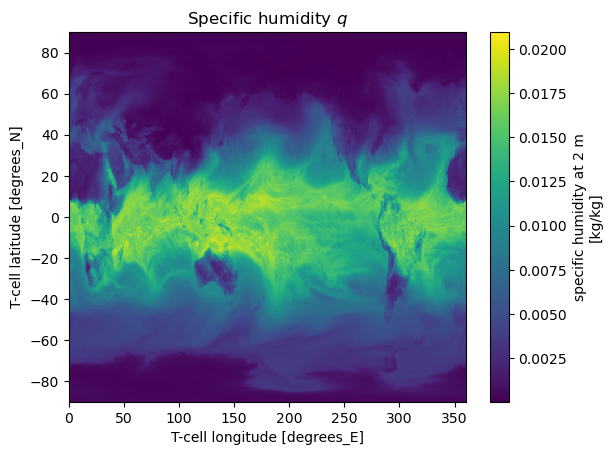

In [43]:
atm.q_ref.plot()
plt.title(r'Specific humidity $q$')

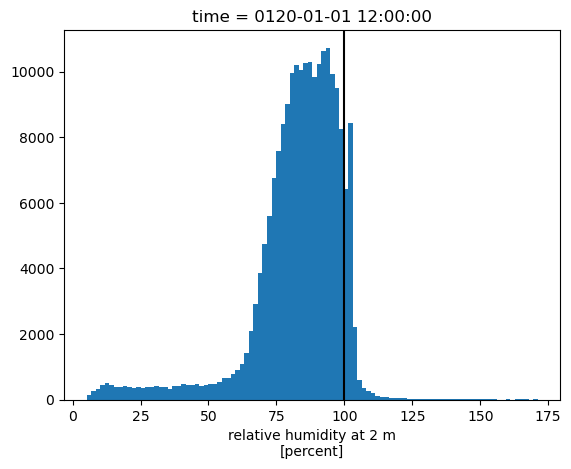

In [125]:
atm.rh_ref.plot.hist(bins=100);
plt.axvline(x=100,color='k')

Text(0.5, 1.0, 'Relative humidity')

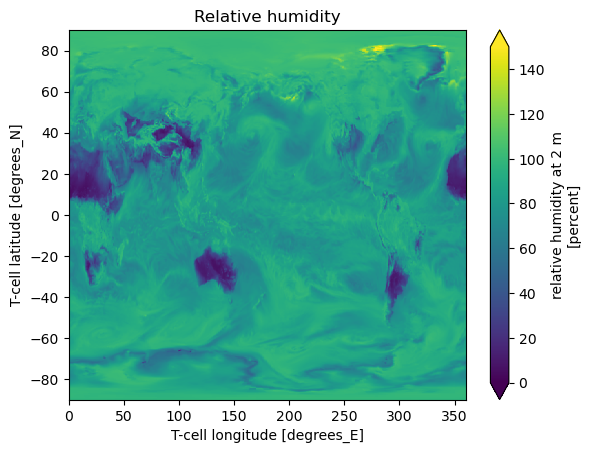

In [122]:
atm.rh_ref.plot(vmax=0,vmin=150)
plt.title('Relative humidity')

Text(0.5, 1.0, 'U_{10}')

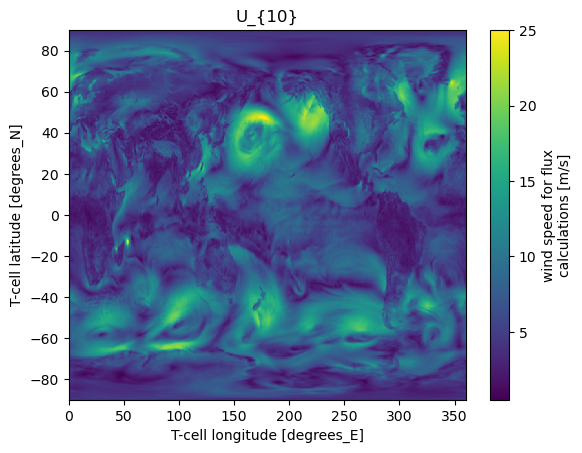

In [47]:
atm.wind.plot()
plt.title(r'U_{10}')

In [ ]:
# ocn = ocn.isel(time=0)
# ocn = ocn.rename({'xt_ocean': 'lon', 'yt_ocean': 'lat'})
# ocn = sort_longitude(ocn)
# ocn['usurf_tgrid'] = ocn.surface_temp.interp(xu_ocean=ocn['lon'],yu_ocean=ocn['lat'])
# ocn['usurf_tgrid'] = ocn.surface_temp.interp(xu_ocean=ocn['lon'],yu_ocean=ocn['lat'])
# ocn['atm_temp'] = atm.temperature.interp(longitude=ocn['lon'],latitude=ocn['lat'])
# ocn['atm_q'] = atm.specific_humidity.interp(longitude=ocn['lon'],latitude=ocn['lat'])
# ocn['atm_u'] = atm.u_component_of_wind.interp(longitude=ocn['lon'],latitude=ocn['lat'])
# ocn['atm_v'] = atm.v_component_of_wind.interp(longitude=ocn['lon'],latitude=ocn['lat'])

In [9]:
ocn = xr.open_dataset('../data/Global/GFDL_CM2p6_control_ocn_0101.nc', chunks={})
# ocn = ocn.isel(time=0)
# ocn = ocn.rename({'xu_ocean': 'lon', 'yu_ocean': 'lat'})
# ocn['sst_ugrid'] = ocn.surface_temp.interp(xt_ocean=ocn['lon'],yt_ocean=ocn['lat'])
ocn

<xarray.Dataset>
Dimensions:       (time: 1, yt_ocean: 2700, xt_ocean: 3600, yu_ocean: 2700,
                   xu_ocean: 3600)
Coordinates:
  * time          (time) object 0181-01-01 12:00:00
  * xt_ocean      (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * xu_ocean      (xu_ocean) float64 -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yt_ocean      (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
  * yu_ocean      (yu_ocean) float64 -81.09 -81.05 -81.0 ... 89.92 89.96 90.0
Data variables:
    surface_temp  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    usurf         (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    vsurf         (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
Attributes:
    filename:   01810101.ocean_minibling_surf_field.nc
    grid_tile:  1
    grid_type:  mosaic
    history:    2014-01-15 17:01:45 -0500: /home/Richard.Slater/ruby/remove_d...
    title:      CM2.6_miniBling

In [43]:
# Read-in atmosphere
atm = xr.open_dataset('../data/Global/ERA5_20200101.nc', chunks={})
atm['temperature'] = atm['temperature'] - 273.15

# Read in ocean; keep everything on the velocity grid
ocn = xr.open_dataset('../data/Global/GFDL_CM2_6_control_0101.nc', chunks={})
ocn = ocn.isel(time=0)
ocn = ocn.rename({'xu_ocean': 'lon', 'yu_ocean': 'lat'})
ocn['sst_ugrid'] = ocn.surface_temp.interp(xt_ocean=ocn['lon'],yt_ocean=ocn['lat'])

# # Rename t grid and interpolate
ocn = sort_longitude(ocn)
ocn['atm_temp'] = atm.isel(hybrid=-1).temperature.interp(longitude=ocn['lon'],latitude=ocn['lat'])
ocn['atm_q'] = atm.isel(hybrid=-1).specific_humidity.interp(longitude=ocn['lon'],latitude=ocn['lat'])
ocn['atm_u'] = atm.isel(hybrid=-1).u_component_of_wind.interp(longitude=ocn['lon'],latitude=ocn['lat'])
ocn['atm_v'] = atm.isel(hybrid=-1).v_component_of_wind.interp(longitude=ocn['lon'],latitude=ocn['lat'])

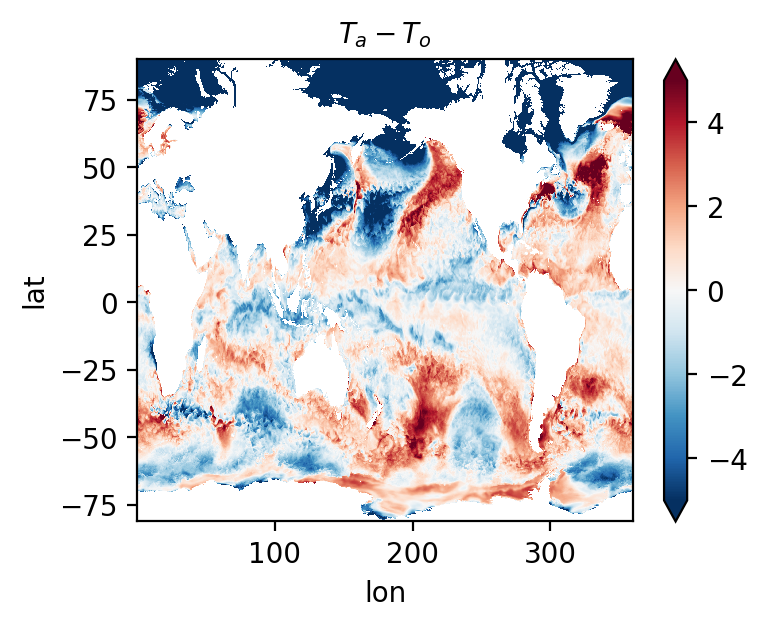

In [64]:
fig = plt.figure(figsize=[4,3], dpi=200)
temp_diff = ocn['atm_temp'] - ocn['sst_ugrid']
temp_diff.plot(vmax=5,vmin=-5,cmap='RdBu_r')
plt.xlabel('lon'); plt.ylabel('lat'); plt.title(r'$T_a - T_o$', fontsize=10)
plt.show()

In [2]:
from mlflux.utils import qsat
def rhcalc(t,p,q):
    ''' Copied from utils.py with ad hoc constant pressure
    '''
    es = qsat(t,p)
    em = p * q / (0.622 + 0.378 * q)
    rh = 100.0 * em / es
    return rh

In [5]:
# Right now what 
rhcalc(0, 910, 0.005)

118.86245699747616

In [111]:
# Compute wind speed or now dis-regard current
# ocn['U'] = (ocn['atm_u']**2 + ocn['atm_v']**2)**0.5
# ocn['U'].plot(vmin=0, vmax=25)

# Compute relative humidity
ocn['atm_p'] = xr.ones_like(ocn['atm_temp']) * 1010
ocn['rh'] = xr.apply_ufunc(
        rhcalc,
        ocn.atm_temp.load(),
        ocn.atm_p.load(), # pressure in millibar, instead of pascal (1 millibar = 100 pascals)
        ocn.atm_q.load(), # already in kg/kg
        input_core_dims=[()] * 3,
        output_core_dims=[()] * 1,
        #dask="parallelized",
        #output_dtypes=[ocn.atm_temp] * 1,  # deactivates the 1 element check which aerobulk does not like
)

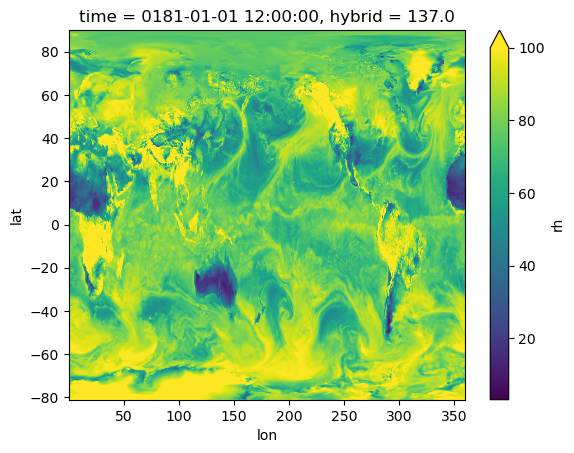

In [113]:
ocn['rh'].plot(vmax=100)

In [65]:
ocn.to_netcdf('../data/Global/Combined_20200101.nc')

### Load ANNs and make predictions

In [48]:
''' Predictor with four inputs and four outputs, and with fixed first layer taking temperature difference. '''
from mlflux.ann import ANNdiff   
from mlflux.predictor import FluxANNs
class Fluxdiff(FluxANNs):
    def __init__(self,params={}):
        super().__init__(params)
        self.mean_func = ANNdiff(**self.mean_ann_para)
        self.var_func = ANNdiff(**self.var_ann_para)  

In [75]:
# i = 5
# filename = "../saved_model/full_anns_diff_momentum_3layers_split%g.p" %(i+1)
# with open(filename, "rb") as input_file:
#     model = pickle.load(input_file)

i = 0
filename = "../saved_model/full_anns_diff_sensible_3layers_split%g.p" %(i+1)
with open(filename, "rb") as input_file:
    model = pickle.load(input_file)

In [76]:
# keys = {'ikeys':['U','tsea','tair','rh'], 'okeys':['taucx'], 'bkeys':['taubx']}
import torch
input_keys = ['wind','sst','t_ref','rh_ref']
# output_keys = ['wind','sst','t_ref','rh']
X = torch.tensor(np.hstack([atm[key].values.reshape(-1,1) for key in input_keys]).astype('float32'))
Y = model.pred_mean(X).detach().numpy()
# error = model.pred_mean(vd.X).detach().numpy() - vd.Y.detach().numpy()

In [77]:
atm['Qs'] = (['grid_yt', 'grid_xt'], Y.reshape(-1,576)) 

Text(0.5, 1.0, 'Sensible heat flux')

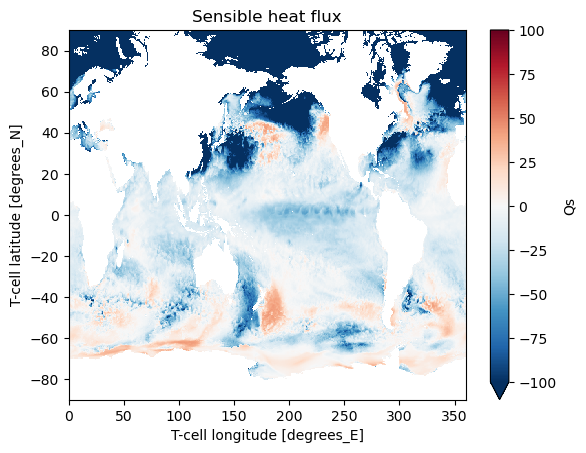

In [78]:
atm['Qs'].plot(vmax=100, vmin=-100, cmap='RdBu_r')
plt.title('Sensible heat flux')

In [96]:
input_keys = ['wind','sst','t_ref','rh_ref']

X = torch.tensor(np.hstack([atm[key].values.reshape(-1,1) for key in input_keys]).astype('float32'))
Y_ensem = []
for i in range(0,6):
    filename = "../saved_model/full_anns_diff_latent_3layers_split%g.p" %(i+1)
    with open(filename, "rb") as input_file:
        model = pickle.load(input_file)
        Y = model.pred_mean(X).detach().numpy()
        Y_ensem.append(Y)

Y_mean = np.average(np.array(Y_ensem), axis=0)
Y_std = np.std(np.array(Y_ensem), axis=0)

In [84]:
atm['Qs_mean'] = (['grid_yt', 'grid_xt'], Y_mean.reshape(-1,576)) 
atm['Qs_std'] = (['grid_yt', 'grid_xt'], Y_std.reshape(-1,576)) 

Text(0.5, 1.0, 'Sensible heat flux mean (from ANN ensem size 6)')

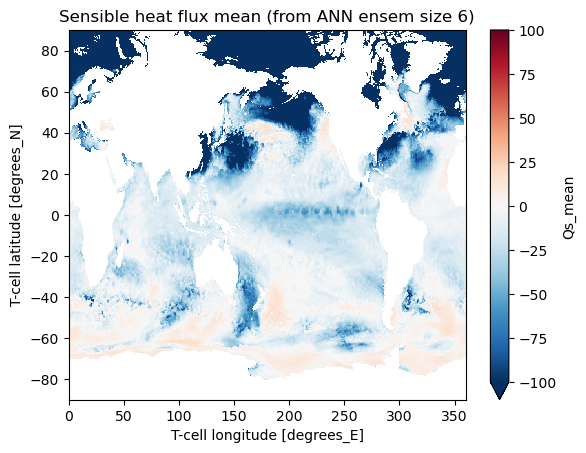

In [94]:
atm['Qs_mean'].plot(vmax=100, vmin=-100, cmap='RdBu_r')
plt.title('Sensible heat flux mean (from ANN ensem size 6)')

Text(0.5, 1.0, 'Sensible heat flux std (from ANN ensem size 6)')

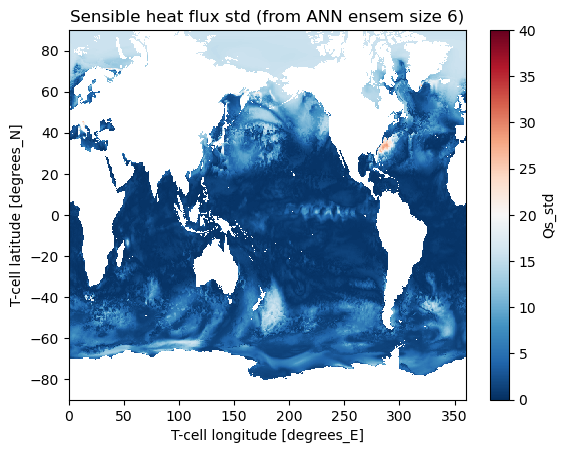

In [95]:
atm['Qs_std'].plot(vmax=40, vmin=0, cmap='RdBu_r')
plt.title('Sensible heat flux std (from ANN ensem size 6)')

In [97]:
input_keys = ['wind','sst','t_ref','rh_ref']

X = torch.tensor(np.hstack([atm[key].values.reshape(-1,1) for key in input_keys]).astype('float32'))
Y_ensem = []
for i in range(0,6):
    filename = "../saved_model/full_anns_diff_latent_3layers_split%g.p" %(i+1)
    with open(filename, "rb") as input_file:
        model = pickle.load(input_file)
        Y = model.pred_mean(X).detach().numpy()
        Y_ensem.append(Y)

Y_mean = np.average(np.array(Y_ensem), axis=0)
Y_std = np.std(np.array(Y_ensem), axis=0)

atm['Ql_mean'] = (['grid_yt', 'grid_xt'], Y_mean.reshape(-1,576)) 
atm['Ql_std'] = (['grid_yt', 'grid_xt'], Y_std.reshape(-1,576)) 

Text(0.5, 1.0, 'Latent heat flux mean (from ANN ensem size 6)')

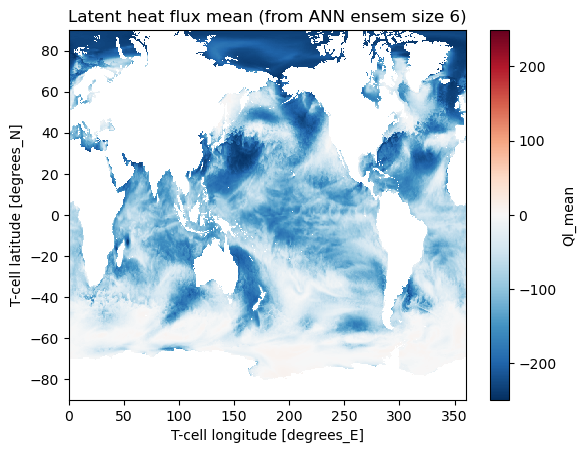

In [111]:
atm['Ql_mean'].plot()
plt.title('Latent heat flux mean (from ANN ensem size 6)')

Text(0.5, 1.0, 'Latent heat flux std (from ANN ensem size 6)')

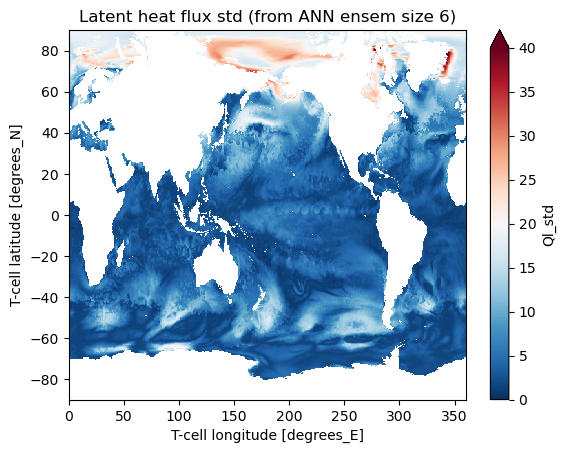

In [112]:
atm['Ql_std'].plot(vmax=40, vmin=0, cmap='RdBu_r')
plt.title('Latent heat flux std (from ANN ensem size 6)')

In [117]:
input_keys = ['wind','sst','t_ref','rh_ref']

X = torch.tensor(np.hstack([atm[key].values.reshape(-1,1) for key in input_keys]).astype('float32'))
Y_ensem = []
for i in range(0,6):
    filename = "../saved_model/full_anns_diff_momentum_3layers_split%g.p" %(i+1)
    with open(filename, "rb") as input_file:
        model = pickle.load(input_file)
        Y = model.pred_mean(X).detach().numpy()
        Y_ensem.append(Y)

Y_mean = np.average(np.array(Y_ensem), axis=0)
Y_std = np.std(np.array(Y_ensem), axis=0)

atm['tau_mean'] = (['grid_yt', 'grid_xt'], Y_mean.reshape(-1,576)) 
atm['tau_std'] = (['grid_yt', 'grid_xt'], Y_std.reshape(-1,576)) 

Text(0.5, 1.0, 'Momentum flux mean (from ANN ensem size 6)')

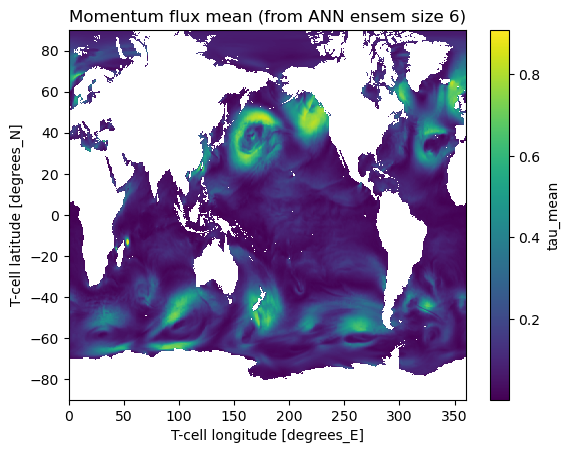

In [115]:
atm['tau_mean'].plot()
plt.title('Momentum flux mean (from ANN ensem size 6)')

Text(0.5, 1.0, 'Momentum flux std (from ANN ensem size 6)')

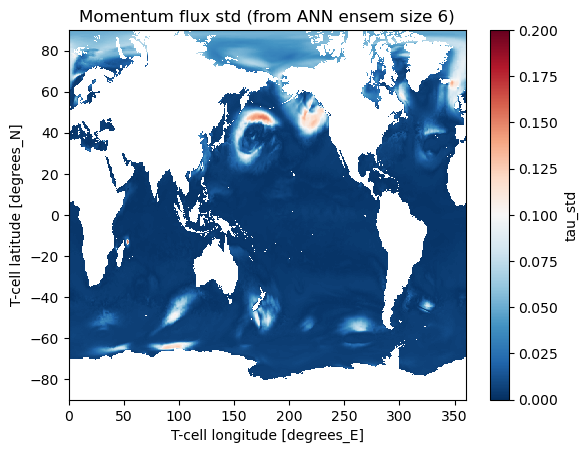

In [120]:
atm['tau_std'].plot(vmax=0.2, vmin=0, cmap='RdBu_r')
plt.title('Momentum flux std (from ANN ensem size 6)')